# Image reconstruction in X-ray tomography
* Authors: Mengda Li, Ségolène Martin

## 1. X-ray tomography

The measurements $y \in R^M$ and the sought absorption image $\bar{x} \in R^N$ obey the linear relation:
$$y = H \bar{x} + w\tag{1}$$
where $w ∈ R^M$ is the measurement noise, that we assume i.i.d. Gaussian with variance $σ^2$. The tomography matrix $H ∈R^{M×N}$ is sparse and encodes the geometry of the measurements.

1. Download the projection matrix $H$ and the image $\bar{x}$ available on the website. Use `loadmat` from `scipy.io` in Python to load the arrays, note that $H$ is stored as a sparse matrix. 

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from pathlib import Path
p = Path('data')
MATRICES = dict()
for matrix in p.iterdir():
    matrix_name = matrix.name[0]
    MATRICES[matrix_name] = sio.loadmat(matrix)

G = MATRICES['G']['G']
H = MATRICES['H']['H']
x = MATRICES['x']['x']

2. Construct $y$, according to model (1), using $σ = 1$.

In [59]:
# sigma = 1
M, N = H.shape
w = np.random.normal(size = (M, 1))
y = H * x + w

3. Here, $N = 90×90$ pixels and $M = 90×180$ measurements. Display a 2D version of $x$ and a 2D version of $y$, also known as sinogram.

<Figure size 1944x648 with 0 Axes>

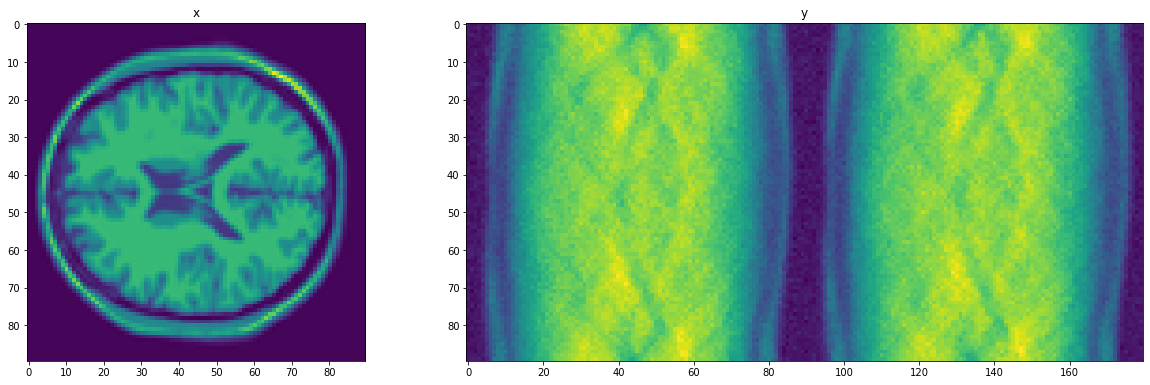

In [90]:
plt.figure(figsize = (27, 9))
# plt.rcParams["figure.figsize"] = (20,10)
_, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]})
a0.imshow(np.reshape(x, (90, 90)))
a0.set_title('x')
a1.imshow(np.reshape(y, (90, 180)))
a1.set_title('y');

## 2. Optimization problem